# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.004
-0.003
0.0
-0.001
-0.001
-0.001
0.971
0.973
0.975
0.973
0.974
1.979
1.978
1.978
1.978
2.982
2.982
2.982
2.982
3.988
3.987
3.987
3.987
4.991
4.99
4.989
4.99
5.997
5.997
5.995
5.996
6.827
6.83
6.831
6.83
6.83
7.679
7.681
7.683
7.682
7.683
8.686
8.686
8.687
9.691
9.692
9.692
9.69
9.69
10.695
10.696
10.694
10.695
11.694
11.697
11.699
11.698
11.698
11.698
12.702
12.704
12.702
12.702
13.702
13.704
13.707
13.706
13.707
14.621
14.62
14.62
14.62
15.534
15.534
15.53
15.531
16.531
16.533
16.539
16.536
17.537
17.537
17.538
18.541
18.541
18.541
18.541
19.545
19.545
19.544
19.543
20.544
20.543
20.543
20.544
21.553
21.552
21.55
21.55
22.342
22.341
22.34
22.341
23.132
23.133
23.133
23.132
24.136
24.135
24.133
24.133
25.138
25.138
25.136
25.136
26.142
26.141
26.14
26.14
27.145
27.145
27.147
27.145
27.144
27.144
28.151
28.15
28.149
29.154
29.153
29.152
29.152
29.99
29.99
29.988
29.989
30.855
30.855
30.85

59.749
59.748
59.749
59.749
59.749
59.749
59.748
59.748
59.748
59.748
59.748
59.748
59.747
59.747
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.746
59.744
59.744
59.744
59.744
59.742
60.006
60.006
60.007
60.006
60.006
60.005
60.031
60.031
60.031
60.03
60.03
60.03
60.03
60.03
60.027
60.03
60.029
60.029
60.029
60.029
60.028
60.028
60.028
60.029
60.03
60.029
60.028
60.029
60.144
60.143
60.182
60.182
60.182
60.193
60.193
60.192
60.188
60.189
60.409
60.413
60.452
60.452
60.456
60.455
60.453
60.453
60.455
60.742
60.784
60.784
60.784
60.782
60.782
60.782
60.781
60.784
61.019
61.036
61.036
61.034
61.038
61.038
61.035
61.03
61.246
61.293
61.294
61.305
61.302
61.305
61.305
61.304
61.303
61.412
61.414
61.458
61.458
61.464
61.462
61.465
61.464
61.464
61.463
61.463
61.463
61.462
61.462
61.463
61.463
61.463
61.464
61.464
61.464
61.464
61.464


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1330,2660,61.464
1331,2662,61.464
1332,2664,61.464
1333,2666,61.464


<IPython.core.display.Javascript object>


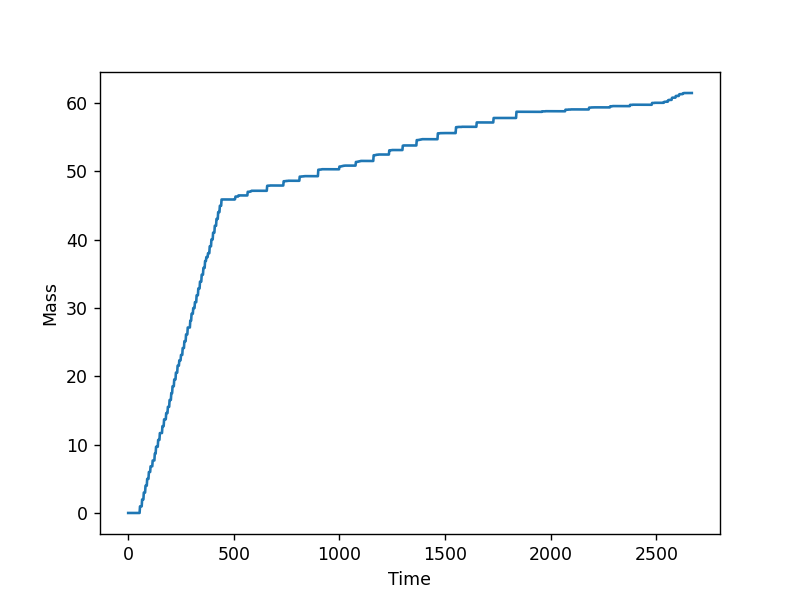

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_040823_S721-726.csv')